# Customer Churn Modeling for Customer Data 

Before we start, let's get an understanding of what customer churn is, why understanding it might be important, and how understanding customer churn can help us prevent it in the future. 

**Understanding Customer Churn**<br>
Customer churn refers to when a customer ends his or her relationship with a business. In the case of a subscription company, this can simply be ending the subscription. In the case of an eCommerce company for example it might not be as clear and is a customer is often viewed as churn after a certain amount of time has elapsed since the last transaction. 

**Importance of predicting customer churn**<br>
Every businesses' priority should be in retaining their customers, since acquiring new customer can be several times more expensive than selling to existing ones. Understanding what drives churn and why customers are churning (or staying) with your product is crucial in managing customer relations and maintaining high retention rates. 

Being able to accurately identify those customers at high risk of churning, may help us to create appropriate marketing strategies and retain them.

## Overview and workflow 

That data we're dealing is from customers at a telecom company, but could be the same or similar for any other subscription-based business. 
The data has 7043 examples and 20 features includin the target variable `Churn` that we're traing to predict. This target variable is a binary variable and indicates whether a customer has left the company or not. We will therefore use different binary classifiers to try to predict the target variable. The remaining variables are mostly demographical variables and product- and service-related variables. 

The dataset contains the following variables: 
- `CustomerID`
- `Gender` - Whether the customer is a male or a female
- `SeniorCitizen` - Whether the customer is a senior citizen or not (1, 0)
- `Partner` - Whether the customer has a partner or not (Yes, No)
- `Dependents` - Whether the customer has dependents or not (Yes, No)
- `tenure` - Number of months the customer has stayed with the company
- `PhoneService` - Whether the customer has a phone service or not (Yes, No)
- `MultipleLines` - Whether the customer has multiple lines or not (Yes, No, No phone service)
- `InternetService` - Customer’s internet service provider (DSL, Fiber optic, No)
- `OnlineSecurity` - Whether the customer has online security or not (Yes, No, No internet service)
- `OnlineBackup` - Whether the customer has online backup or not (Yes, No, No internet service)
- `DeviceProtection` - Whether the customer has device protection or not (Yes, No, No internet service)
- `TechSupport` - Whether the customer has tech support or not (Yes, No, No internet service)
- `StreamingTV` - Whether the customer has streaming TV or not (Yes, No, No internet service)
- `StreamingMovies` - Whether the customer has streaming movies or not (Yes, No, No internet service)
- `Contract` - The contract term of the customer (Month-to-month, One year, Two year)
- `PaperlessBilling` - Whether the customer has paperless billing or not (Yes, No)
- `PaymentMethod` - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharges` - The amount charged to the customer monthly
- `TotalCharges` - The total amount charged to the customer
- **`Churn`** - Whether the customer churned or not (Yes or No) - **TARGET**

**Workflow**<br>
1) *EDA - What data are we dealing with?*
- Display distributions of numerical and categorical variables
- Are there any inconsistencies? 
- Are the variables encoded correctly? 

2) *Preprocessing - Let's clean our data*
- Missing Values
- Outliers
- Categorical Values (unique values, encoding) 

3) *Feature Engineering and Selection - What can be improved?*
- Look at correlation with target varible
- Multicollineality 

4) *Training time - Model building and comparison*
- Compare different algorithms
- Use gridsearch/randomsearch for parameter tuning <br>

5) *Model Evaluation and Conclusions*
- Evaluation with ROC-AUC

In [4]:
# Importing libraries 

import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None) # show all columns
pd.set_option('display.max_rows', None) # show all rows
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## Visualization
from sklearn.metrics import plot_confusion_matrix
import missingno as msno

## ML
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, log_loss, classification_report, roc_auc_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


## Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [5]:
# Importing the dataset 

data_raw = pd.read_csv('https://raw.githubusercontent.com/lucamarcelo/Churn-Modeling/main/Customer%20Churn%20Data.csv', index_col='customerID')

# We'll split the data to create a train and test set, and to avoid data leakage in preprocessing 
train, test = train_test_split(data_raw, test_size=0.25)

print('Data raw: {},\n train: {},\n test: {}.'.format(data_raw.shape, train.shape, test.shape))

Data raw: (7043, 20),
 train: (5282, 20),
 test: (1761, 20).


## 1) EDA - What data are we dealing with? 

### Initial Exploration and Descriptive Stats

In [6]:
# Look at the data and variable types - remember we set the customerID column as index, since it's very unlikely to help us

data_raw.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Looking at dimensionality of the data 

print('The dataset has {} rows and {} features.'.format(data_raw.shape[0], data_raw.shape[1]))

The dataset has 7043 rows and 20 features.


In [8]:
# Looking at the datatypes - mostly categorical variables

data_raw.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

As we can see, most variables are encoded as categorical variables, a.k.a `object`. However, there's one where the encoding is wrong: The variable `TotalCharges` is a numerical value and should be encoded as such. Right now, it's encoded as text. Let's correct this in the following code block.

In [9]:
# Correct TotalCharges variable

data_raw['TotalCharges'] = pd.to_numeric(data_raw['TotalCharges'], errors='coerce')

In [10]:
# Looking at descriptive stats for the numerical variables - no weird distributions or large outliers here

data_raw.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Cardinality

In [11]:
# What's the cardinality of our categorical variables? - No features with high cardinality

def unique_per_col(df): 
    #Selecting only categorical cols
    cols = (df.dtypes == 'object')
    object_cols = list(cols[cols].index)
    #Count unique values
    object_nunique = list(map(lambda col: df[col].nunique(), object_cols))
    d = dict(zip(object_cols, object_nunique))
    #Print number of unique entries by column, in ascending order
    for row in sorted(d.items(), key=lambda x: x[1]):
        print(row)
    
unique_per_col(data_raw)

('gender', 2)
('Partner', 2)
('Dependents', 2)
('PhoneService', 2)
('PaperlessBilling', 2)
('Churn', 2)
('MultipleLines', 3)
('InternetService', 3)
('OnlineSecurity', 3)
('OnlineBackup', 3)
('DeviceProtection', 3)
('TechSupport', 3)
('StreamingTV', 3)
('StreamingMovies', 3)
('Contract', 3)
('PaymentMethod', 4)


In [12]:
# Distribution of target variable - seems pretty balanced

data_raw['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

#### Missing values

,variable,Unique values,Nan %,zeros %
18,TotalCharges,6531,0.2,0
0,gender,2,0,0
1,SeniorCitizen,2,0,83.8
17,MonthlyCharges,1585,0,0
16,PaymentMethod,4,0,0
15,PaperlessBilling,2,0,0
14,Contract,3,0,0
13,StreamingMovies,3,0,0
12,StreamingTV,3,0,0
11,TechSupport,3,0,0


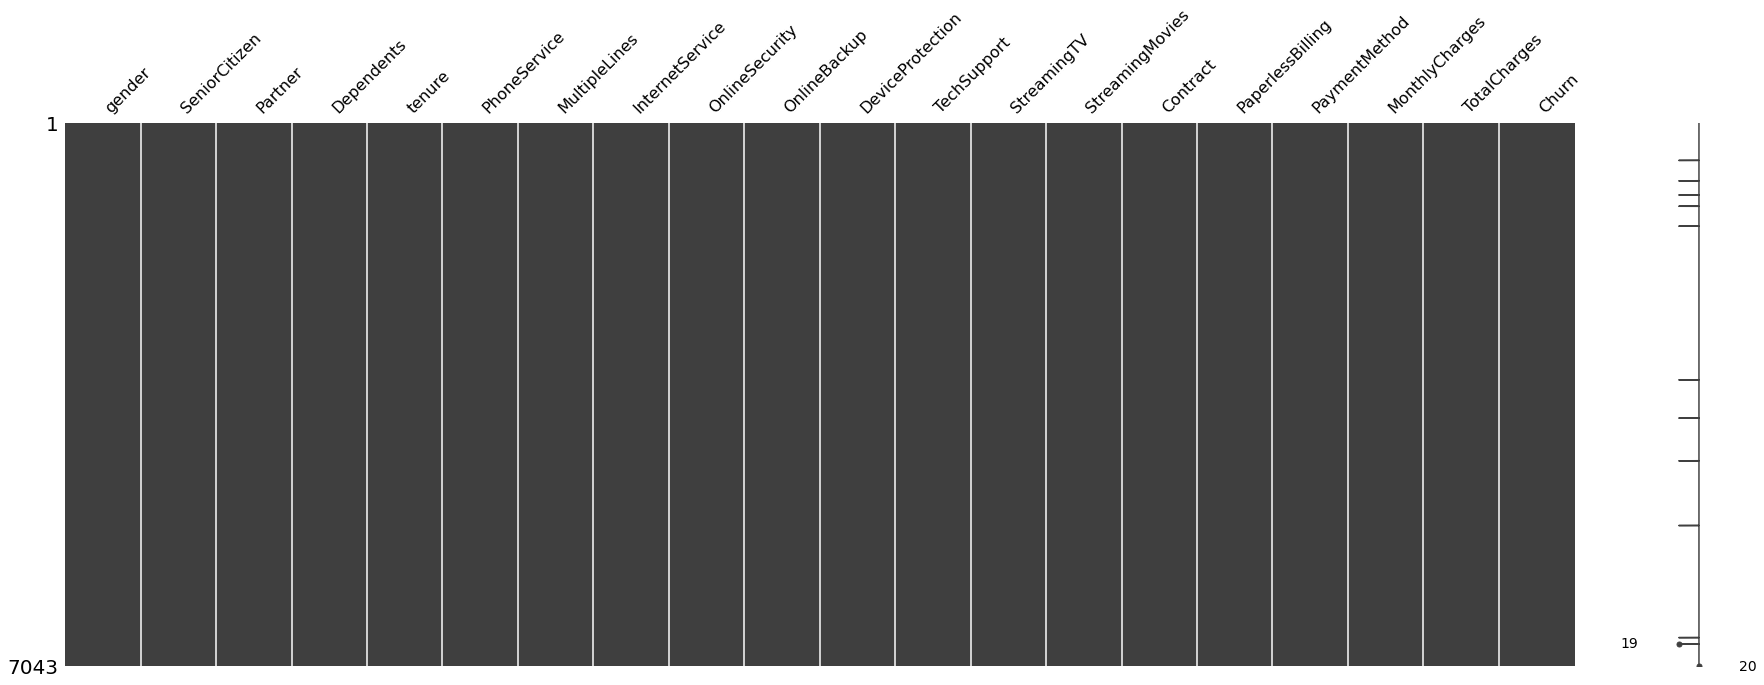

In [13]:
# Check where there's missing values

# Plot missing values for the whole dataset 

msno.matrix(data_raw, figsize = (30,10))

def missing_values(data):
    df = pd.DataFrame()
    for col in list(data):
        unique_values = data[col].unique()
        try:
            unique_values = np.sort(unique_values)
        except:
            pass
        nans = round(pd.isna(data[col]).sum()/data.shape[0]*100, 1)
        zeros = round((data[col] == 0).sum()/data.shape[0]*100, 1)
        #empty = round((data[data[col]] == '').sum()/data.shape[0]*100, 1)
        df = df.append(pd.DataFrame([col,
                                     len(unique_values),
                                     nans,
                                     zeros,
                                     #empty
                                    ]).T, ignore_index = True)

    return df.rename(columns = {0: 'variable',
                                1: 'Unique values',
                                2: 'Nan %',
                                3: 'zeros %',
                                #4: 'empty'
                               }).sort_values('Nan %', ascending=False)

missing_values(data_raw)

### Looking at distributions graphically  

#### Univariate Analysis

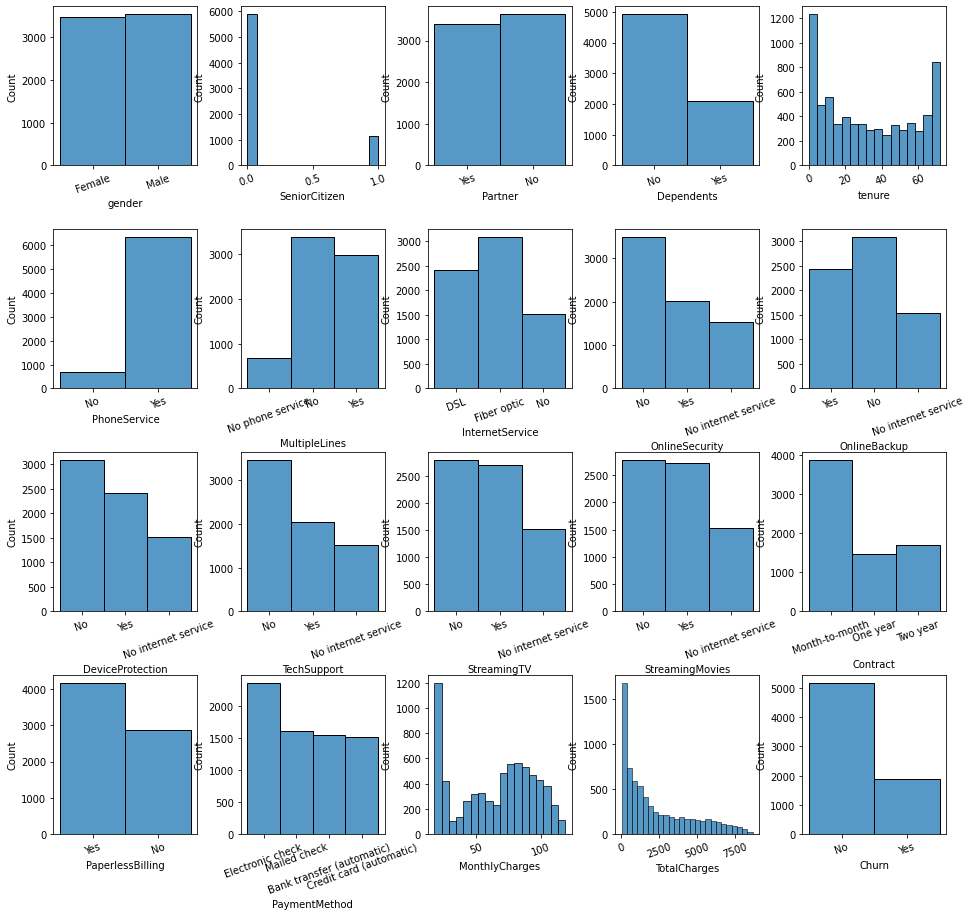

In [14]:
# Variable distributions

fig, ax = plt.subplots(4, 5, figsize=(16, 10))
plt.subplots_adjust(left=None, bottom=0.05, right=None, top=1.2, wspace=0.3, hspace=0.4)
for variable, subplot in zip(data_raw.columns, ax.flatten()):
    plot = sns.histplot(data_raw[variable], ax=subplot)
    plt.setp(plot.get_xticklabels(), rotation=20)

#### Bivariate Analysis

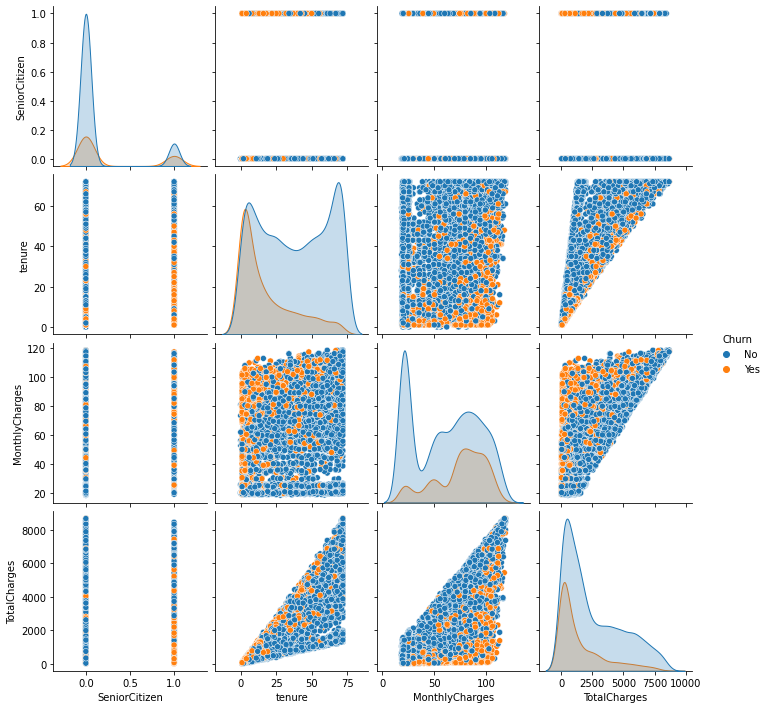

In [15]:
# Numerical-numerical variables

sns.pairplot(data = data_raw, hue='Churn')
plt.show()

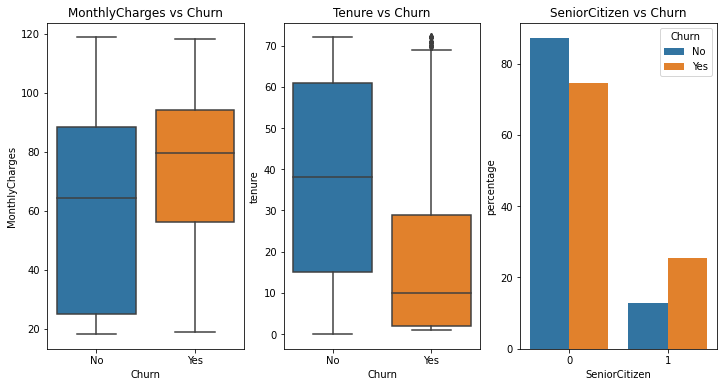

In [16]:
# Categorical-numerical variables

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

## Are churned customers likely to get charged more? - It seems like yes
plt.subplot(1,3,1)
sns.boxplot(data_raw['Churn'], data_raw['MonthlyCharges'])
plt.title('MonthlyCharges vs Churn')

## When do customers churn? 
plt.subplot(1,3,2)
sns.boxplot(data_raw['Churn'], data_raw['tenure'])
plt.title('Tenure vs Churn')

## Are senior citizen more likely to churn? - Again, it seems so
plt.subplot(1,3,3) 
counts = (data_raw.groupby(['Churn'])['SeniorCitizen']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
plot = sns.barplot(x="SeniorCitizen", y="percentage", hue="Churn", data=counts).set_title('SeniorCitizen vs Churn')

In [17]:
# How many senior citizen does our dataset have anyway? 

senior_prop = round(data_raw['SeniorCitizen'].value_counts(normalize=True)[0]*100,1)
nonsenior_prop = round(data_raw['SeniorCitizen'].value_counts(normalize=True)[1]*100,1)

print('Our dataset consists of {}% non-senior citizen and {}% senior citizen.'.format(senior_prop, nonsenior_prop))


Our dataset consists of 83.8% non-senior citizen and 16.2% senior citizen.


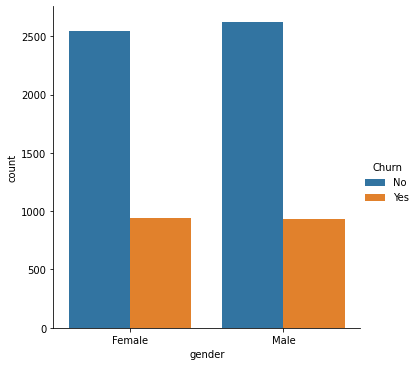

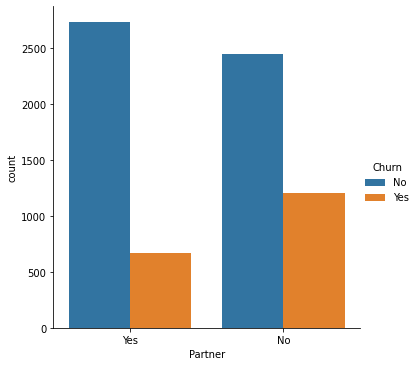

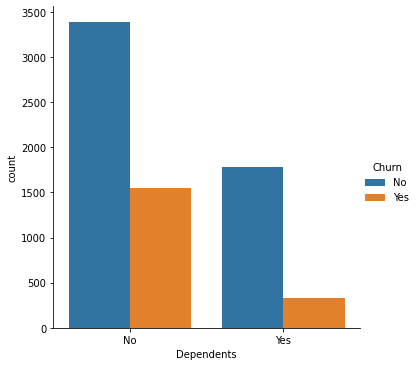

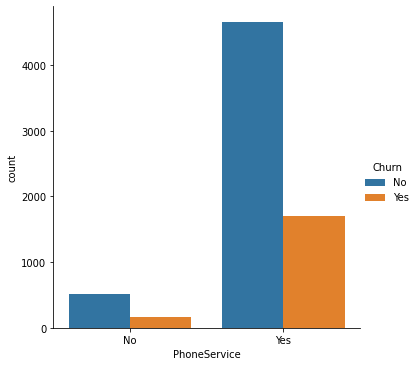

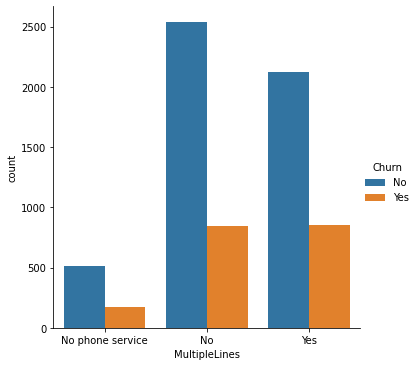

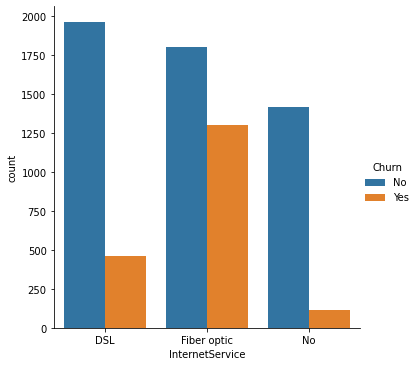

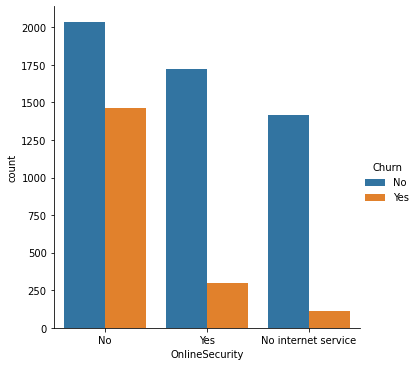

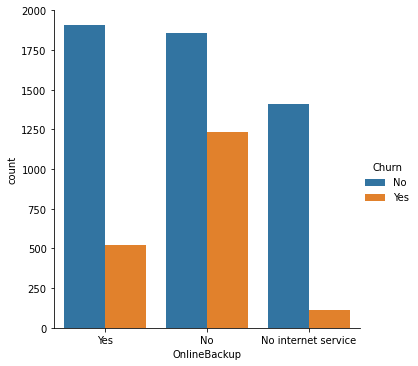

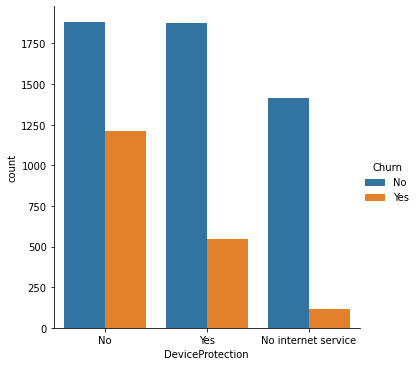

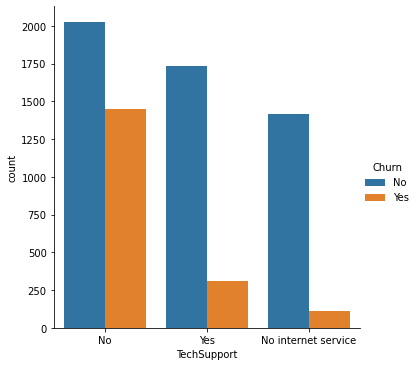

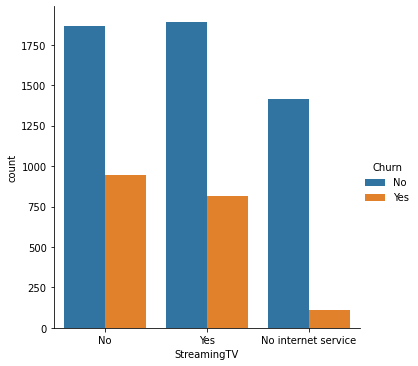

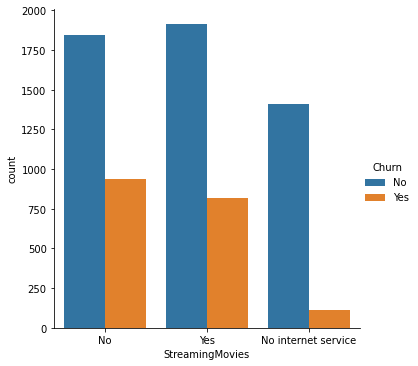

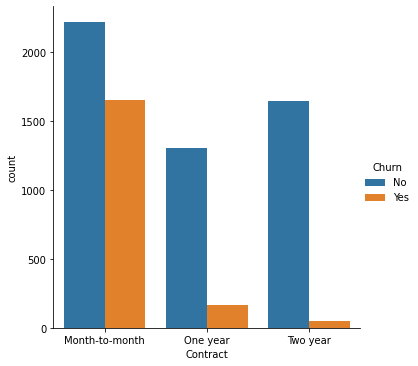

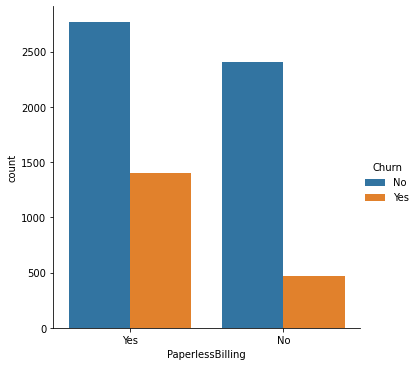

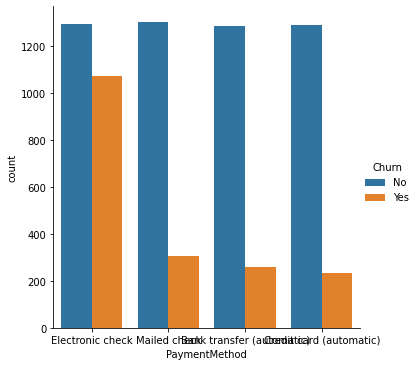

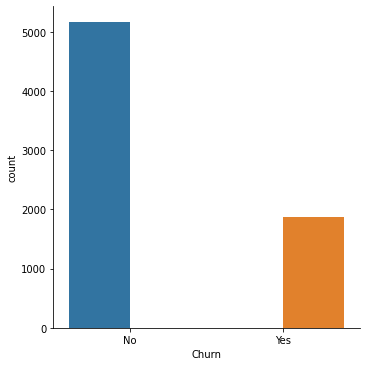

In [18]:
# Categorical-categorical variables

## How does the churn across different services look like? 
## How about the contract type? 
## Are those receiving tech support less likely to churn? 
## How about those receiving device protection less likely to churn? 

for col in data_raw.select_dtypes(exclude=np.number):
  sns.catplot(x=col, kind='count', hue='Churn', data=data_raw.select_dtypes(exclude=np.number))
  

#### Multivariate Analysis

In [19]:
# Encode Churn as numeric variable

data_raw['Churn'] = data_raw['Churn'].map( {'No': 0, 'Yes': 1} ).astype(int)

**PaymentMethod, Contract and Churn**

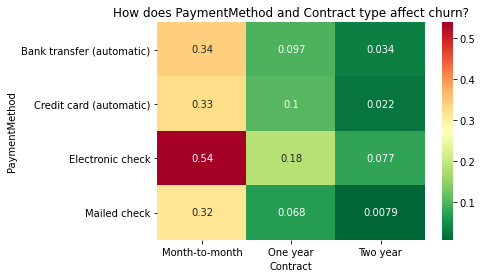

In [20]:
# How does PaymentMethod and Contract type affect churn?

## Create pivot table
result = pd.pivot_table(data=data_raw, index='PaymentMethod', columns='Contract',values='Churn')

## create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn_r').set_title('How does PaymentMethod and Contract type affect churn?')
plt.show()

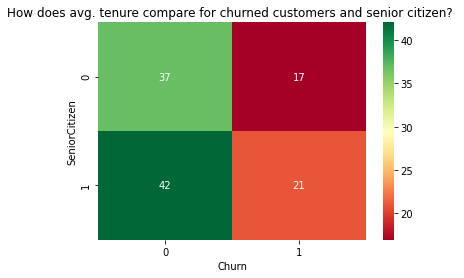

In [21]:
# How does tenure compare for churned customers and senior citizen? 

result = pd.pivot_table(data=data_raw, columns=['Churn'], index=['SeniorCitizen'],values='tenure')
sns.heatmap(result, annot=True, cmap = 'RdYlGn').set_title('How does avg. tenure compare for churned customers and senior citizen? ')
plt.show()

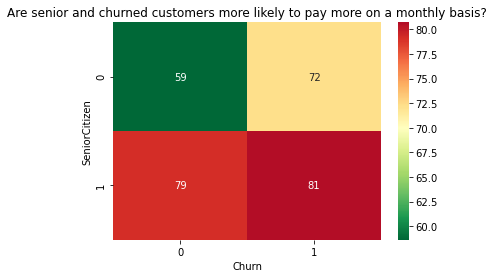

In [22]:
# Are senior and churned customers more likely to pay more? 

result = pd.pivot_table(data=data_raw, columns=['Churn'], index=['SeniorCitizen'],values='MonthlyCharges')
sns.heatmap(result, annot=True, cmap = 'RdYlGn_r', center=70).set_title('Are senior and churned customers more likely to pay more on a monthly basis?')
plt.show()

### Conclusions from EDA 

Looking at the descriptive statistics and especially the visualizations during  EDA, we can already draw a few conclusions about our data: 
- We are working with a relatively balanced dataset. This is important in regards to what algorithm we can use to create predictions and what evaluation metric we can use. In this project we will focus on the *area under the curve* for the *receiver operating characteristic curve*.
- Most variables in our dataset are categorical. We will therefore need to encode them to able to feed them to an ML algorithm. 
- We introduced a few missing values, since there were empty strings in the TotalCharges column. Apart from that there don't seem to be any `NaNs`. 
- Looking at the distributions, there are a few variables that seem to have a bigger effect on whether someones is likely to churn or not. Those are: 
  - `PaymentMethod`: Those paying by electronic check are much more likely to churn. 
  - `Contract`: It seems that those who have a month-to-month contract are more likely to churn. 
  - `TechSupport`: Also the ones receiving tech support are less likely to churn compared to those that do. 
  - `InternetService`: The ones that contracted Fiber are more likely to churn compared to those with DSL. 
- It seems that `MonthlyCharges` play an important role whether a customer will stay with the company or not. On the one side,  customers that churn, pay on average almost 22% more. While seniors pay as much as 34% more on average - and that's even 37% when they churn. 
- `SeniorCitizen` are also much more likely to churn compared to non-seniors.
- It makes sense that average `tenure` is lower for churned customers. SeniorCitizen are more likely to stay with the company longer.
 

## 2) Preprocessing - Let's clean our data 

### Creating a pipeline
For the preprocessing, we will create a pipeline with the estimator at the end of the pipeline. This is a general convention, since scikit learn's pipelines will call `fit_transform` on all the pipeline steps except the last one, which will be the estimator (or predictive algorithm). Depending on our requirements and data at hand, we can for example include imputation, scaling, encoding of categorical features, and dimensionality reduction. In our case we will apply imputation, encoding, and scaling. 

*Why would we want to use the pipeline for preprocessing?*<br>
Creating a pipeline is great for a number of reasons, compared to doing the preprocessing "manually": 
- **It prevents data leakage** <br>When we calculate the mean for imputation for a given variable for example, we will only use the *training data* for this, since otherwise we would include information from the test set in in the preprocessing. A pipeline makes in really easy to avoid data leakage, since we call `fit_transform` on the training data and `predict` on the test data. 
- **It minimizes errors**<br>With manual preprocessing there are a lot more smaller steps involved, and sometimes every variable needs to be done by hand. This increases the possibility for errors. 
- **Cleaner looking code**<br>The pipeline is written once and than we only need to call the corresponding method. As a results the code is cleaner easier to read.
- **Allows to cross-validate the whole pipeline**<br>Instead of cross-validating only the estimator, we can perform cross-validation on the whole pipeline. The same applies for hyperparameter tuning. 

#### Missing values 
While encoding the `TotalCharges` to numerical (because it was initially encoded as string), we discovered a few empty strings and passed them to `NaN`. 
Apart from that we did not find any missing values. For imputation we will use scitkit learn's `SimpleImputer` with `strategy='mean'`. 


#### Scaling
Algorithms that measure distances between data points work much better when the data is scaled. We basically scale the data to make different numerical ranges  comparable to each other. In our case we will be using scikit-learn's `StandardScaler`. 

#### Categorical Encoding
We've previously seen that our dataset contains mostly categorical variables, with mostly low cardinality. Since most machine learning algorithms do not understand non-numeric data, we will need to encode the features to numerical values to be able to feed the data to an algorithm. Since all the features have a very low cardinality, we will go with the `OneHotEncoder`. 

## 3) Feature Engineering and Feature Selection 

### Feature Selection

Our pipeline will also include a feature selection part where we will only select a few "best-performing" features. For this we will be using scikit learn's `SelectKBest`. 

We will however have a look at multicollinearity and correlation with target variable in the following.  

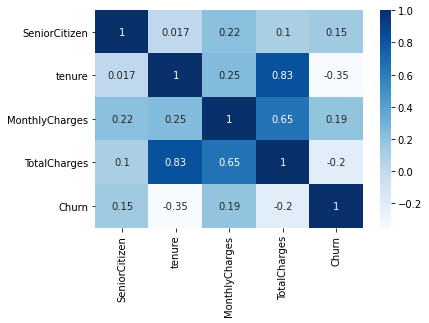

In [23]:
# Looking at multicollinearity with the feature matrix

plt.figure(figsize=(6,4))
correlations = data_raw.corr()
sns.heatmap(correlations, annot=True, cmap='Blues')
plt.show()

## 4) Training Time 

### Data Splitting

In [24]:
# We'll split the data to create a train and test set, and to avoid data leakage in preprocessing 
train, test = train_test_split(data_raw, test_size=0.25, random_state=123)

print('Data raw: {},\n train: {},\n test: {}.'.format(data_raw.shape, train.shape, test.shape))

Data raw: (7043, 20),
 train: (5282, 20),
 test: (1761, 20).


In [25]:
# Separate features and target in the training data 

X = train.drop(columns='Churn', axis=1)
y = train['Churn']

### Creating the Pipeline

The pipeline allows us to chain multiple steps together. In our case, this will be mainly the preprocessing part, followed by a feature selection, and an estimator in the end. For each type of variable we will create an own pipeline with multiple steps. Our final pipeline will basically consist of chaining multiple pipelines together. 

For the estimator we will try different algorithms and loop through them. For the best model we will perform a gridearch to optimize the hyperparameters. 

**Evaluation**<br>Since our dataset is slightly imbalanced - or at least both classes are not represented equally - 

In [26]:
# Creating a scikit learn pipeline for preprocessing

## Selecting categorical and numeric features
numerical_ix = X.select_dtypes(include=np.number).columns
categorical_ix = X.select_dtypes(exclude=np.number).columns

## Create preprocessing pipelines for each datatype 
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])

## Putting the preprocessing steps together
preprocessor = ColumnTransformer([
        ('numerical', numerical_transformer, numerical_ix),
        ('categorical', categorical_transformer, categorical_ix)],
         remainder='passthrough')

In the following we're going to try out different classifier algorithms by creating a list and looping through that list. 
The final pipeline will therefore be created *within* the for-loop. This is because we cannot define the pipeline beforehand. If we define something like a final pipeline, we need to specify the estimator at the end of the pipeline. 

#### Creating an example pipeline with the kNN classifier

For the sake of demonstration, we will create a "fully-functional" pipeline as you normally would, meaning with an estimator at the end.


**Calling `.fit()` on the pipeline**<br>
Note that we only call `.fit()` on the pipeline, instead of `.fit_transform()`. This is because as user, we only call `.fit()` but internally, it will also call `.transform()` - **except of the last step**. That's why it's so important, as before mentioned, to include the estimator **at the end of the pipeline.** Also note that the pipeline will only work with objects that support the both `.fit` and `.transform()`. 

In [27]:
# Create example pipeline with kNN

example_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(k=len(X.columns))), # keep the same amount of columns for now
    ('classifier', KNeighborsClassifier())
])

cross_val_score(example_pipe, X, y, cv=5, scoring='roc_auc').mean()
#example_pipe.fit(X_train, y_train)
#example_pipe.score(X_test, y_test)

0.7617758221695411

We get the highest cross-validated AUC with 0.7869 by selecting k=9.




Text(0, 0.5, 'Cross-Validated AUC')

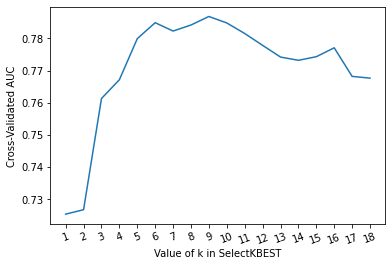

In [28]:
# Let's try the kNN but modifying the amount of features we include and compare the results

k_range = list(range(1, len(X.columns))) # 1 until 18
k_scores = []

for k in k_range:
  example_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(k=k)), # keep the same amount of columns for now
    ('classifier', KNeighborsClassifier())])
  score = cross_val_score(example_pipe, X, y, cv=5, scoring='roc_auc').mean()
  k_scores.append(score)

k_scores_df = pd.DataFrame({
    'k_range': 
      k_range, 
    'k_scores':
      k_scores
})

max_value_k = np.array(k_scores_df[k_scores_df['k_scores'] == k_scores_df['k_scores'].max()])

print('We get the highest cross-validated AUC with {} by selecting k={}.\n\n'.format(round(max_value_k[0,1],4), max_value_k[0,0].astype(int)))

# Plotting the AUC across the different k values
plt.plot(k_range, k_scores)
plt.xlabel('Value of k in SelectKBEST')
plt.xticks(k_range, rotation=20) 
plt.ylabel('Cross-Validated AUC')


In [38]:
k_scores_df = pd.DataFrame({
    'Number of features': 
      k_range, 
    'k_scores':
      k_scores
})

maxValuesObj = np.array(k_scores_df[k_scores_df['k_scores'] == k_scores_df['k_scores'].max()])
k_scores_df.sort_values(by='k_scores', ascending=False)


,Number of features,k_scores
8,9,0.786861
5,6,0.784926
9,10,0.784845
7,8,0.784204
6,7,0.782320
10,11,0.781558
4,5,0.779949
11,12,0.777864
15,16,0.777099
14,15,0.774326


### Model Selection

#### Trying out different algorithms

In [30]:
# Trying out different classifiers and selecting the best

## Creat list of classifiers we're going to loop through
classifiers = [
    KNeighborsClassifier(),
    SVC(random_state=123),
    DecisionTreeClassifier(random_state=123),
    RandomForestClassifier(random_state=123),
    AdaBoostClassifier(random_state=123),
    GradientBoostingClassifier(random_state=123)
    ]

classifier_names = [
    'KNeighborsClassifier()',
    'SVC()',
    'DecisionTreeClassifier()',
    'RandomForestClassifier()',
    'AdaBoostClassifier()',
    'GradientBoostingClassifier()'
]

model_scores = []

## Looping through the classifiers
for classifier, name in zip(classifiers, classifier_names):
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('selector', SelectKBest(k=len(X.columns))),
        ('classifier', classifier)])
    score = cross_val_score(pipe, X, y, cv=10, scoring='roc_auc').mean() # we're using the AUC here!
    model_scores.append(score)
    print("Model score for {}: {}".format(name, score))


Model score for KNeighborsClassifier(): 0.7612908381378575
Model score for SVC(): 0.8016581799333506
Model score for DecisionTreeClassifier(): 0.658419086454004
Model score for RandomForestClassifier(): 0.8243600923390618
Model score for AdaBoostClassifier(): 0.8463012180435487
Model score for GradientBoostingClassifier(): 0.8463252152654143


#### Comparing the algorithms

Text(0, 0.5, 'Cross-Validated AUC')

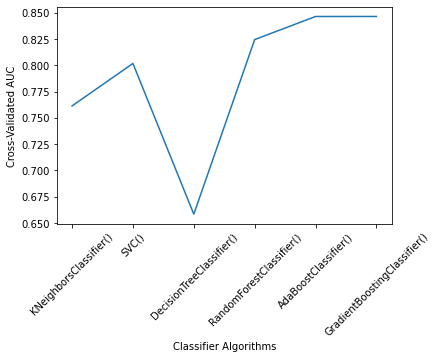

In [31]:
# Plotting models and performance

plt.plot(classifier_names, model_scores)
plt.xlabel('Classifier Algorithms')
plt.xticks(classifier_names, rotation=45) 
plt.ylabel('Cross-Validated AUC')

In [32]:
# Creating df with model performance

model_performance = pd.DataFrame({
    'Classifier': 
      classifier_names, 
    'Cross-validated AUC':
      model_scores
})

## Sorting in descending manner
sorted_models = model_performance.sort_values('Cross-validated AUC', ascending = False, ignore_index=True)
display(sorted_models)
## Extracting best performing model and saving it for the following step 
best_model = eval(sorted_models['Classifier'][0]) # we use eval(), because otherwise we get a string instead of the algorithm class


,Classifier,Cross-validated AUC
0,GradientBoostingClassifier(),0.846325
1,AdaBoostClassifier(),0.846301
2,RandomForestClassifier(),0.824360
3,SVC(),0.801658
4,KNeighborsClassifier(),0.761291
5,DecisionTreeClassifier(),0.658419


### Hyperparameter Tuning

We will pick the best model from our dataframe above and perform a gridsearch with scikit learn's `GridSearchCV` to find the best "settings" (hyperparameters) for the algorithms. We will also, simultaneously, search for the best `k` in our feature selection step with `SelectKBest`. 

In [48]:
# Creating the final pipeline

pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('selector', SelectKBest(k=len(X.columns))),
        ('classifier', best_model)
])

score = cross_val_score(pipe, X, y, cv=10, scoring='roc_auc').mean()
print('The pipeline with the {}, the best baseline-model, has a cross-validated AUC of {}%'.format(str(best_model), score))

The pipeline with the GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), the best baseline-model, has a cross-validated AUC of 0.8462767255426449%


Let's have a look at what parameters we can actually tune. This will be important when we create the grid that we're going to search. 

In [ ]:
# What parameters can we tune? - A LOT! 
# Do we want to test them all? - HELL NO!

pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'selector', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__numerical', 'preprocessor__categorical', 'preprocessor__numerical__memory', 'preprocessor__numerical__steps', 'preprocessor__numerical__verbose', 'preprocessor__numerical__imputer', 'preprocessor__numerical__scaler', 'preprocessor__numerical__imputer__add_indicator', 'preprocessor__numerical__imputer__copy', 'preprocessor__numerical__imputer__fill_value', 'preprocessor__numerical__imputer__missing_values', 'preprocessor__numerical__imputer__strategy', 'preprocessor__numerical__imputer__verbose', 'preprocessor__numerical__scaler__copy', 'preprocessor__numerical__scaler__with_mean', 'preprocessor__numerical__scaler__with_std', 'preprocessor__categorical__memory', 'preprocessor__categorical__steps', 'preprocessor__cate

What are then some parameters we want to adjust in our pipeline? 
- In `SelectKBest`:
  - `k`
- In `GradientBoostingClassifier`:
  - `n_estimators`
  - `learning_rate`
  - `max_depth`

Remember: The more hyperparameters you search for, the longer it will take. <br>
We will therefore stick to the four hyperparameters mentioned above. Now we can simply create a grid and perform a search for the best combination with `GridSearchCV`.

In [49]:
# Creating the grid
grid = {
    "selector__k": [12,13,14,15,16,17,18],
    "classifier__max_depth":[1,3,5],
    "classifier__learning_rate":[0.01,0.1,1],
    "classifier__n_estimators":[100,200,300,400]
}

# Instantiating the gridsearch and fitting the data 
gridsearch = GridSearchCV(estimator=pipe, param_grid=grid, n_jobs= 1, scoring='roc_auc') # GridSearchCV uses 5-fold CV by default
gridsearch.fit(X, y)  

# Getting the results
print(gridsearch.best_params_) 
print(gridsearch.best_score_) 

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 1, 'classifier__n_estimators': 400, 'selector__k': 16}
0.8501488378467128


## 5) Creating predictions for unseen data
Remember we left out some data at the beginning called `test`? Well, this data has not been seen by our model yet and will help us get a more accurate measure of the perfomance of our model. Even though we did cross-validation, we still want to test the model performance on completely unseen data. Our pipeline, including the preprocessors, the feature selector, and the classifier, has learned the parameters from the training data and will now apply those learned parameters on to the test data. 

In [50]:
# Separate features and target in the test data 

X_test = test.drop(columns='Churn', axis=1)
y_test = test['Churn']

In [ ]:
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(k=18)), 
    ('classifier', GradientBoostingClassifier())])\
    .fit(X, y)


AUCROC: 0.8441470897420832 
Accuracy: 0.7927314026121521


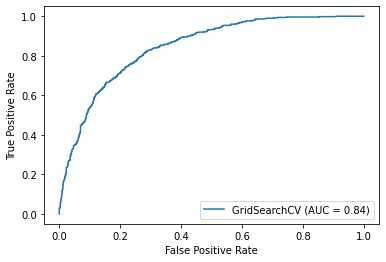

In [52]:
# Refitting the training data with the best parameters 
gridsearch.refit

# Creating the predictions
y_pred = gridsearch.predict(X_test)

y_score = gridsearch.predict_proba(X_test)[:, 1]

# Looking at the performance
print('AUCROC:', roc_auc_score(y_test, y_score), '\nAccuracy:', accuracy_score(y_test, y_pred))

# Plotting the ROC curve
plot_roc_curve(gridsearch, X_test, y_test)  
plt.show()   

## 6) Conclusions and Final Thoughts

In this project we've worked with customer data to get an understanding of the factors that drive churn. We've performed exploratory data analysis to understand which variables affect each other and where customers are more likely to churn. We saw that churning customers are likely to be charged more on a monthly basis and often have a month-to-month contract. 

We've gone from our raw data that had some wrongly encoded variables, some missing values, and a lot of categorical data, to a clean and correctly encoded dataset by automating our preprocessing with a pipeline.

By comparing different classifier algorithms, we were able to select the one that performed best and tuned its hyperparameters using `GridSearchCV`. By passing the entire pipeline to the GridSearch, we were also able to optimize for the `k` in our feature selection step, where we used scikit learn's `SelectKBest`.

We were able to predict churn for new data - in practice this could be for example new customers - with an accuracy of almost 80% and and AUC of 0.84. 
Our model can now be implemented in production and can be used to assess who of our customers are most likely to churn. This helps us to guide our marketing- and retention strategy. 